In [187]:
import pandas as pd
import numpy as np


# CRM DATASET
crm_sales = pd.read_csv(r'..\won_analysis\all_spain_leads.csv')

# MKT DATASET
mkt_sales =pd.read_csv(r'..\won_analysis\won_date.csv')

# ADM DATASET
adm_sales =pd.read_csv(r'..\won_analysis\cohorts.csv')

C:\Users\ThinkPad-PC\AppData\Local\Temp\ipykernel_2480\1420789369.py:6: DtypeWarning: Columns (17,28) have mixed types. Specify dtype option on import or set low_memory=False.
  crm_sales = pd.read_csv(r'..\won_analysis\all_spain_leads.csv')


limpiar dataset

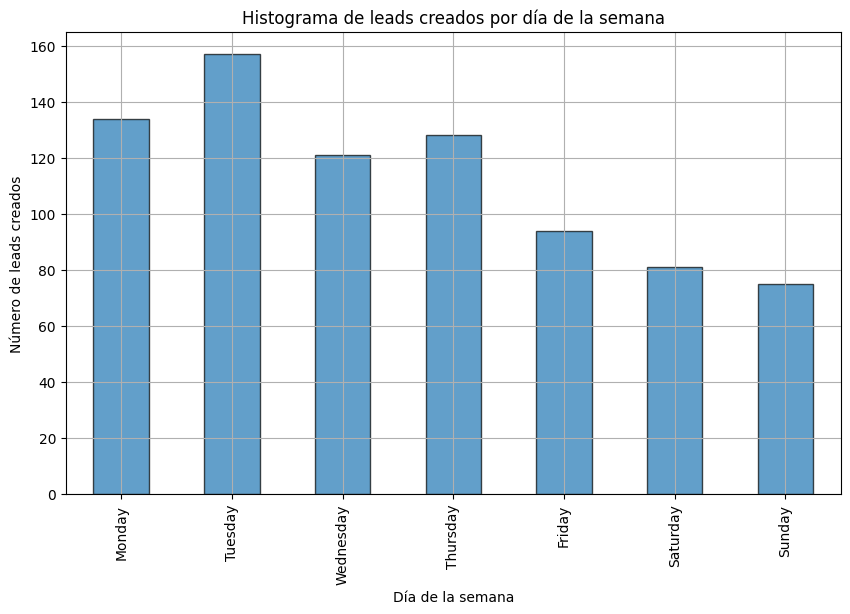

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convertir las columnas 'won_at' y 'created_at' a tipo datetime, forzando las conversiones y gestionando errores
crm_sales['won_at'] = pd.to_datetime(crm_sales['won_at'], errors='coerce')
crm_sales['created_at'] = pd.to_datetime(crm_sales['created_at'], errors='coerce')

# Máscara para columnas relevantes
mask = ['email', 'created_at', 'deal_status', 'won_at']

# Filtrar por 'deal_status' == 'WON'
filtered_crm_sales = crm_sales[crm_sales['deal_status'] == 'WON']

# Seleccionar las columnas relevantes y eliminar duplicados
filtered_crm_sales = filtered_crm_sales[mask].drop_duplicates()

# Extraer los días de la semana de 'created_at'
filtered_crm_sales['weekday_created'] = filtered_crm_sales['created_at'].dt.day_name()

# Definir el orden de los días de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Crear el histograma ordenando los días de la semana
plt.figure(figsize=(10, 6))
filtered_crm_sales['weekday_created'].value_counts().reindex(days_order).plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Día de la semana')
plt.ylabel('Número de leads creados')
plt.title('Histograma de leads creados por día de la semana')
plt.grid(True)
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np

# # Convertir las columnas 'won_at' y 'created_at' a tipo datetime, forzando las conversiones y gestionando errores
# crm_sales['won_at'] = pd.to_datetime(crm_sales['won_at'], errors='coerce')
# crm_sales['created_at'] = pd.to_datetime(crm_sales['created_at'], errors='coerce')

# # Máscara para columnas relevantes
# mask = ['email', 'created_at', 'deal_status', 'won_at']

# # Filtrar por 'deal_status' == 'WON', rango de fechas en 'won_at' y 'created_at' >= 2022
# filtered_crm_sales = crm_sales[(crm_sales['deal_status'] == 'WON') &
#                                (crm_sales['won_at'].dt.year >= 2023) &
#                                (crm_sales['won_at'].dt.year <= 2024) &
#                                (crm_sales['created_at'].dt.year >= 2023)]

# # Seleccionar las columnas relevantes y eliminar duplicados
# filtered_crm_sales = filtered_crm_sales[mask].drop_duplicates()

# # Ver el resultado
# filtered_crm_sales


,email,created_at,deal_status,won_at
8056,espino.le@gmail.com,2023-02-08 11:55:20.097768+00:00,WON,2023-05-18 03:28:10.344783+00:00
8078,benalexanderthegreat@gmail.com,2023-01-03 15:38:25.486196+00:00,WON,2023-12-19 11:54:47.636414+00:00
8258,tuliot.portela@gmail.com,2024-01-07 16:32:32.277950+00:00,WON,2024-01-10 20:18:04.823346+00:00
8302,davidjaner@yahoo.es,2023-01-18 17:12:58.569091+00:00,WON,2023-04-12 10:45:42.180135+00:00
8333,cris.cira@hotmail.com,2023-01-16 13:31:28.220220+00:00,WON,2023-02-14 18:51:29.885425+00:00
...,...,...,...,...
50475,lucasdarioiturrez@gmail.com,2024-11-10 13:39:17.276054+00:00,WON,2024-11-13 16:56:03.370153+00:00
50568,ptorres2000@gmail.com,2024-10-25 16:37:43.979606+00:00,WON,2024-11-11 18:01:03.366476+00:00
51103,cllanoscor@gmail.com,2024-09-09 12:28:41.297990+00:00,WON,2024-09-11 17:38:29.629183+00:00
51126,juanomartel@gmail.com,2024-09-17 22:03:40.406075+00:00,WON,2024-11-08 12:25:04.696763+00:00


In [189]:
# Calcular la diferencia en horas entre 'created_at' y 'won_at'
filtered_crm_sales['hours_difference'] = (filtered_crm_sales['won_at'] - filtered_crm_sales['created_at']).dt.total_seconds() / 3600
# Filtrar las filas donde 'hours_difference' es menor a 2000
filtered_crm_sales = filtered_crm_sales[filtered_crm_sales['hours_difference'] < 2000]
# Ver el resultado
filtered_crm_sales


,email,created_at,deal_status,won_at,hours_difference
8258,tuliot.portela@gmail.com,2024-01-07 16:32:32.277950+00:00,WON,2024-01-10 20:18:04.823346+00:00,75.759040
8333,cris.cira@hotmail.com,2023-01-16 13:31:28.220220+00:00,WON,2023-02-14 18:51:29.885425+00:00,701.333796
8416,gabrielazaro97@gmail.com,2023-01-19 08:30:42.718587+00:00,WON,2023-02-14 18:51:27.895104+00:00,634.345882
8487,ajme89@gmail.com,2023-01-21 16:07:30.274763+00:00,WON,2023-03-21 17:36:54.148827+00:00,1417.489965
8776,carlosduarterguez@gmail.com,2023-02-07 16:46:30.233128+00:00,WON,2023-04-13 12:01:34.164110+00:00,1555.251092
...,...,...,...,...,...
50475,lucasdarioiturrez@gmail.com,2024-11-10 13:39:17.276054+00:00,WON,2024-11-13 16:56:03.370153+00:00,75.279471
50568,ptorres2000@gmail.com,2024-10-25 16:37:43.979606+00:00,WON,2024-11-11 18:01:03.366476+00:00,409.388719
51103,cllanoscor@gmail.com,2024-09-09 12:28:41.297990+00:00,WON,2024-09-11 17:38:29.629183+00:00,53.163425
51126,juanomartel@gmail.com,2024-09-17 22:03:40.406075+00:00,WON,2024-11-08 12:25:04.696763+00:00,1238.356747


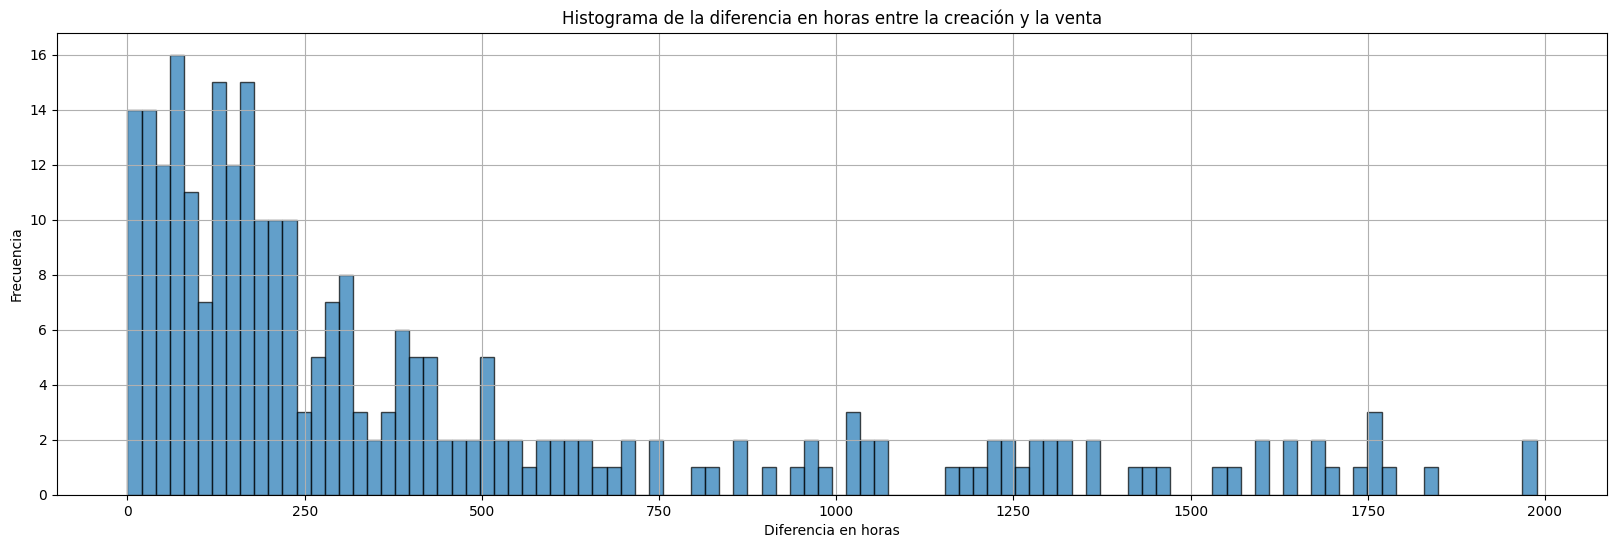

In [190]:
import matplotlib.pyplot as plt

# Crear un histograma de las diferencias en horas
plt.figure(figsize=(20, 6))
plt.hist(filtered_crm_sales['hours_difference'], bins=100, edgecolor='k', alpha=0.7)
plt.xlabel('Diferencia en horas')
plt.ylabel('Frecuencia')
plt.title('Histograma de la diferencia en horas entre la creación y la venta')
plt.grid(True)
plt.show()


In [191]:
filtered_crm_sales['hours_difference'].mean()

np.float64(431.9190977468424)

## Analisis

### total de conversión a won

Si se tiene en cuenta solo la información del CRM, los resultados son los siguientes

C:\Users\ThinkPad-PC\AppData\Local\Temp\ipykernel_2480\1050230483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crm_sales['weekday_created'] = filtered_crm_sales['created_at'].dt.day_name()


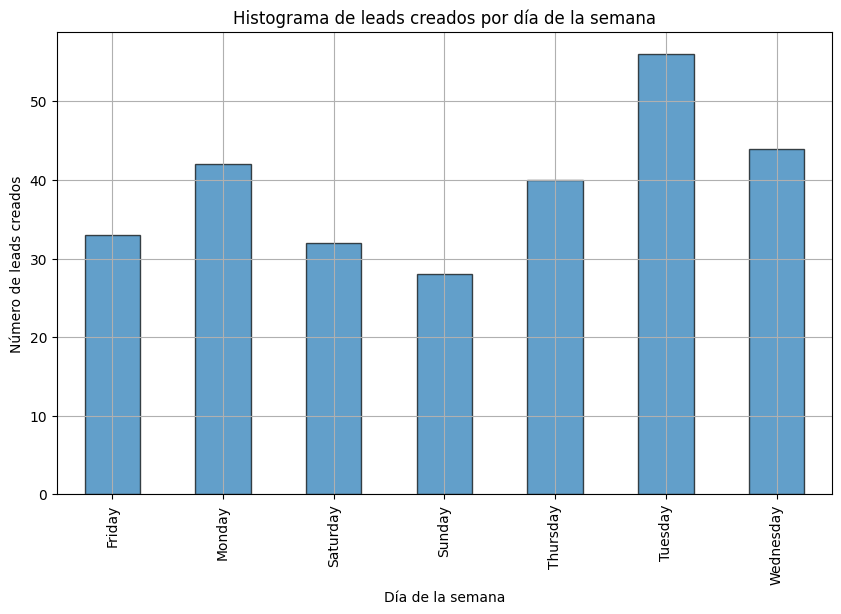

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame ya está definido como filtered_crm_sales

# Extraer los días de la semana de 'created_at'
filtered_crm_sales['weekday_created'] = filtered_crm_sales['created_at'].dt.day_name()

# Crear el histograma
plt.figure(figsize=(10, 6))
filtered_crm_sales['weekday_created'].value_counts().sort_index().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Día de la semana')
plt.ylabel('Número de leads creados')
plt.title('Histograma de leads creados por día de la semana')
plt.grid(True)
plt.show()


C:\Users\ThinkPad-PC\AppData\Local\Temp\ipykernel_2480\3232137959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_crm_sales['weekday_created'] = filtered_crm_sales['created_at'].dt.day_name()


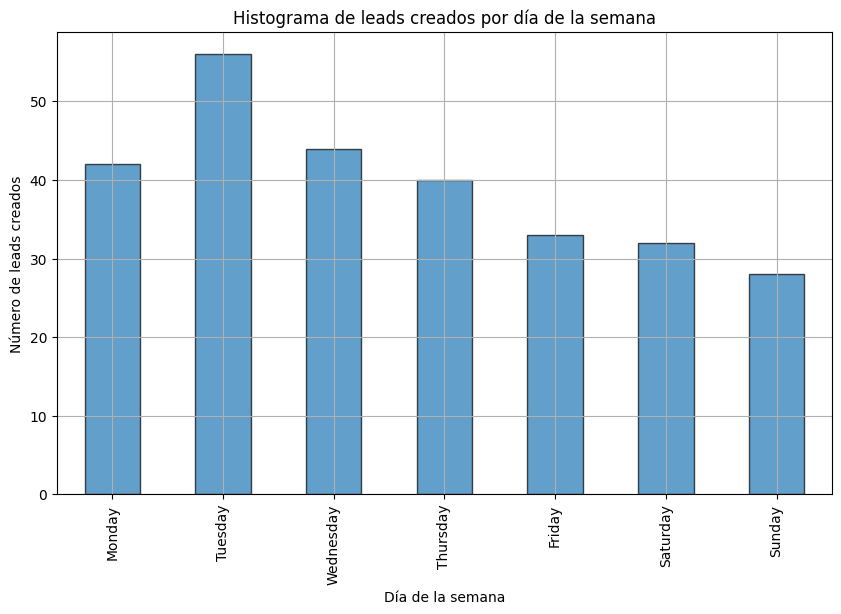

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame ya está definido como filtered_crm_sales

# Extraer los días de la semana de 'created_at'
filtered_crm_sales['weekday_created'] = filtered_crm_sales['created_at'].dt.day_name()

# Definir el orden de los días de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Crear el histograma ordenando los días de la semana
plt.figure(figsize=(10, 6))
filtered_crm_sales['weekday_created'].value_counts().reindex(days_order).plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Día de la semana')
plt.ylabel('Número de leads creados')
plt.title('Histograma de leads creados por día de la semana')
plt.grid(True)
plt.show()
